In [297]:
import pandas as pd
import numpy as np
from plotnine import *
pd.options.display.max_rows = 100

In [298]:
## Import dataset into dataframe.
## It's very clean already.
%matplotlib inline
adf = pd.read_csv('Airline_Delay_Cause.csv')

In [299]:
## Top 5 rows
## Add linear time column to facilitate plotting
adf['time'] = (adf['year']-2007)*12+adf['month']
adf.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,time
0,2022,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",79.0,12.0,5.34,0.59,...,3.19,0.0,0.0,909.0,384.0,70.0,250.0,0.0,205.0,188
1,2022,8,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,11.0,4.19,0.00,...,2.32,1.0,1.0,675.0,176.0,0.0,231.0,0.0,268.0,188
2,2022,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,4.0,3.18,0.00,...,0.31,0.0,0.0,193.0,158.0,0.0,21.0,0.0,14.0,188
3,2022,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",162.0,15.0,5.36,1.31,...,3.81,1.0,0.0,1110.0,758.0,49.0,149.0,0.0,154.0,188
4,2022,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",123.0,18.0,3.84,1.31,...,8.32,10.0,0.0,984.0,172.0,41.0,313.0,0.0,458.0,188


In [300]:
## Sub-table with total of flights and total minutes delayed
tot_my = adf.groupby(['time']).agg({'arr_flights': sum, 'arr_delay':sum}).reset_index()


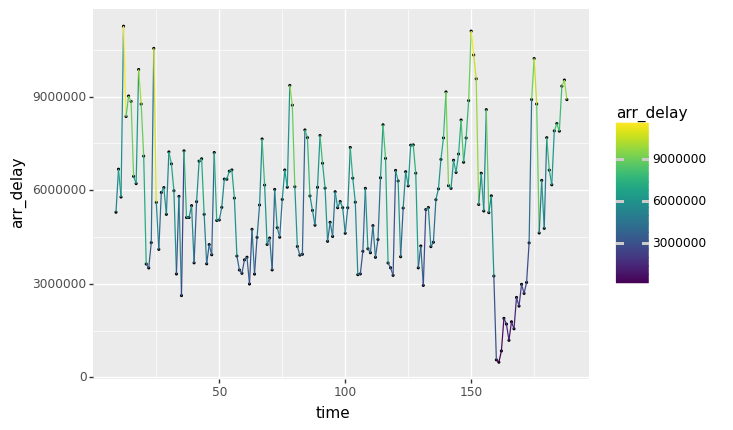

<ggplot: (8789242369997)>

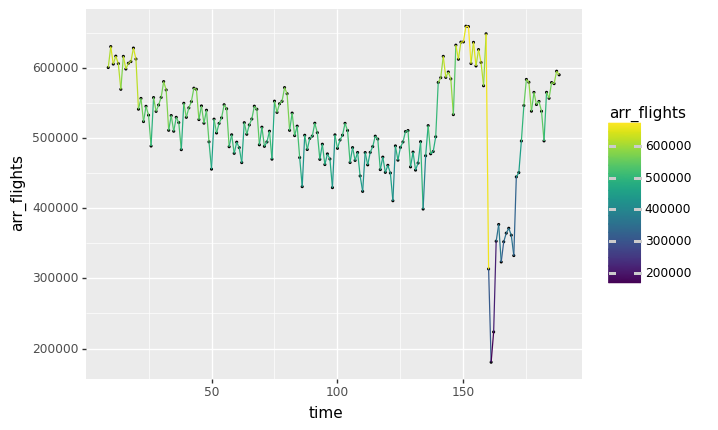

<ggplot: (8789242783284)>

In [301]:
## Before normalization, both of the plots

ggplot(tot_my, aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay'))
ggplot(tot_my, aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights'))


In [302]:
## Now finding minutes delayed per flight arrivals.
## This is useful for finding relative change
tot_my['MnPrFt'] = tot_my['arr_delay']/tot_my['arr_flights']


,time,arr_flights,arr_delay,MnPrFt
0,9,600187.0,5294460.0,8.821351
1,10,629992.0,6674331.0,10.594311
2,11,605149.0,5782072.0,9.554791
3,12,616382.0,11261442.0,18.270232
4,13,605765.0,8366662.0,13.811729
...,...,...,...,...
175,184,556502.0,8136821.0,14.621369
176,185,578819.0,7895973.0,13.641524
177,186,577283.0,9338161.0,16.176054
178,187,594957.0,9534221.0,16.025059


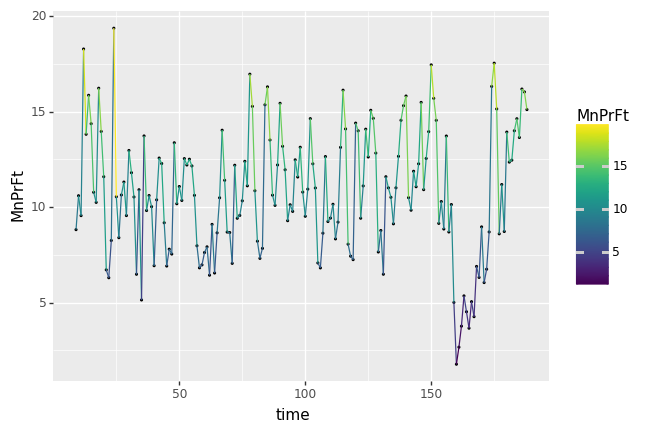

<ggplot: (8789242292444)>

In [303]:
## Plot ratio
ggplot(tot_my, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))

,time,arr_flights,arr_delay,MnPrFt
120,129,458727.0,3510130.0,7.651893
121,130,479797.0,4210367.0,8.775309
122,131,454162.0,2946976.0,6.488821
123,132,464205.0,5379020.0,11.587596
124,133,494577.0,5444278.0,11.007948
125,134,398713.0,4191095.0,10.511558
126,135,474578.0,4330939.0,9.125874
127,136,517442.0,5696146.0,11.008279
128,137,477393.0,6041754.0,12.655724
129,138,480609.0,6988563.0,14.541057


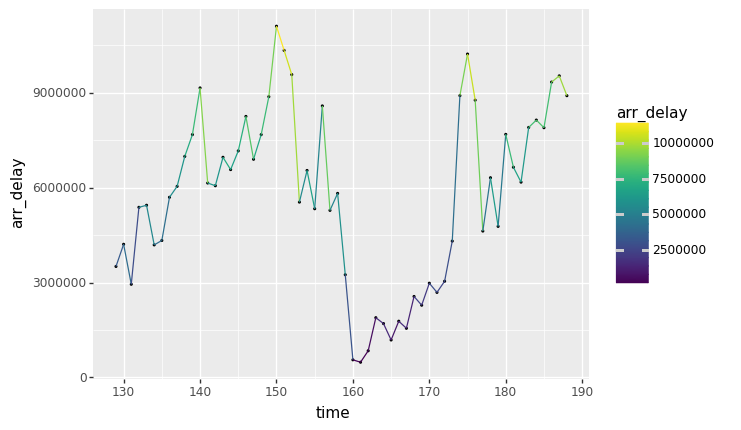

<ggplot: (8789312960582)>

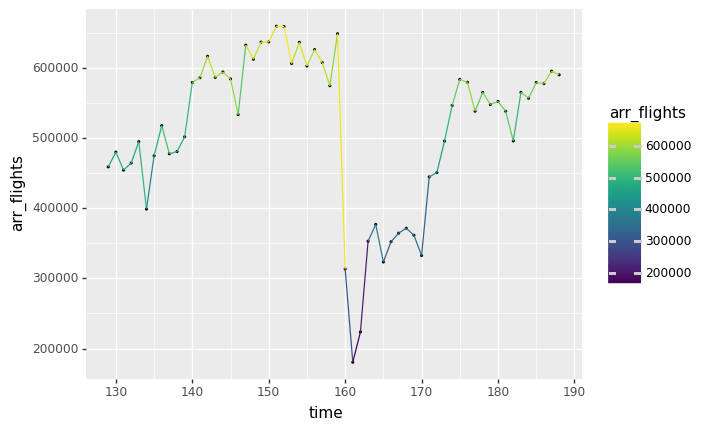

<ggplot: (8789224082725)>

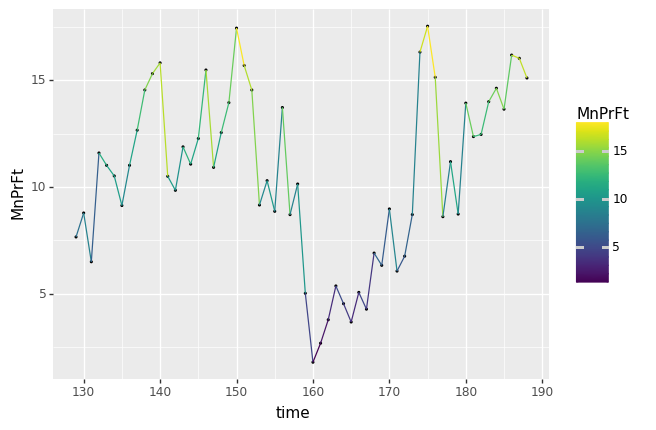

<ggplot: (8789295764679)>

In [304]:
## To focus on time near Covid beginning, repeat the last three graphs for the past 5 years.

Last5 = tot_my[120 : 180]
Last5

ggplot(Last5, aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay'))
ggplot(Last5, aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights'))
ggplot(Last5, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))

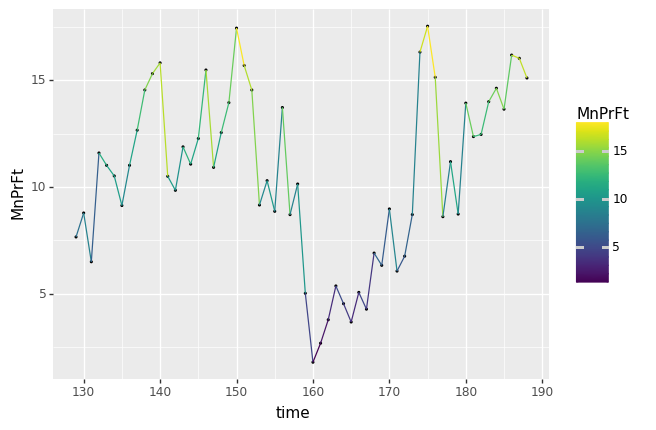

<ggplot: (8789212542425)>

In [305]:
## year-long segments
ggplot(Last5, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))

In [306]:
##functions to print a plot with given intervals
##lower and upper determine an (inclusive) integer interval of years (from 2007)
def giveMnPrFt(df, lower, upper):
    if (lower > upper): 
        pass
    if (lower == upper):
        return(ggplot(tot_my[(upper)*12:(upper+1)*12], aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt')))
    for i in [lower, upper]:
        return(ggplot(tot_my[(i)*12:(upper+1)*12], aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt')))
    pass
## Last5 can alternatively be this
## giveMnPrFt(tot_my,11, 15)


def givearr_delay(df, lower, upper):
    if (lower > upper): 
        pass
    if (lower == upper):
        return(ggplot(tot_my[(upper)*12:(upper+1)*12], aes(x='time', y='arr_delay'))+geom_point(size =0.25) +geom_line(aes(color='arr_delay')))
    for i in [lower, upper]:
        return(ggplot(tot_my[(i)*12:(upper+1)*12], aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay')))
    pass


def givearr_flights(df, lower, upper):
    if (lower > upper): 
        pass
    if (lower == upper):
        return(ggplot(tot_my[(upper)*12:(upper+1)*12], aes(x='time', y='arr_flights'))+geom_point(size =0.25) +geom_line(aes(color='arr_flights')))
    for i in [lower, upper]:
        return(ggplot(tot_my[(i*12):(upper+1)*12], aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights')))
    pass


In [307]:
#givearr_delay(tot_my, 2, 2)
#givearr_flights(tot_my, 2, 2)
#giveMnPrFt(tot_my, 0, 0)

There's a fairly clear impact around time = 160 (i.e. April 2020). All 3 experience a drop. The fact that the MnPrFt (delayed minutes/total arrivals) lowered at this time as well implies that the number of delayed minutes fell at a faster rate than the number of arrivals fell (i.e. in ratio to prior value).

We now look at different airports.

In [359]:
## returns airport specific dataframes over given time interval [9,188]
def airports(lowT, hiT, df): 
    df = df.loc[(df['time']<=hiT) & (df['time']>= lowT)].groupby(['airport']).agg({'arr_flights': sum, 'arr_delay':sum}).reset_index()
    df['MnPrFt'] = df['arr_delay']/df['arr_flights']
    return df

## Use to define Top N (by number of flight arrivals)
## We use this as people are most likely to fly to these airports
def airTopN(lowT, HiT, df, N):
    ap = airports(lowT, HiT, df).sort_values(by='arr_flights', ascending = False)
    return ap.head(N)

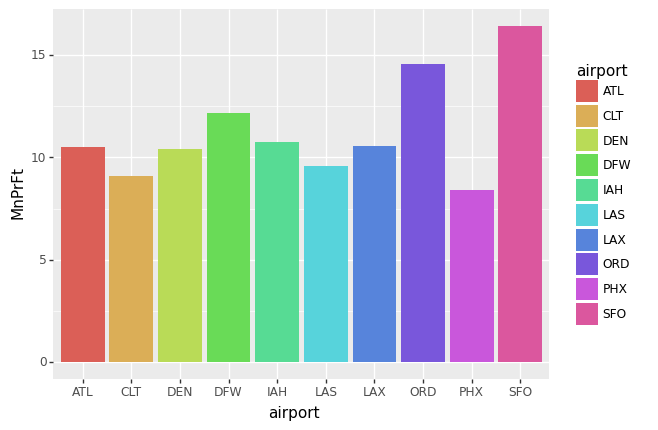

<ggplot: (8789312955655)>

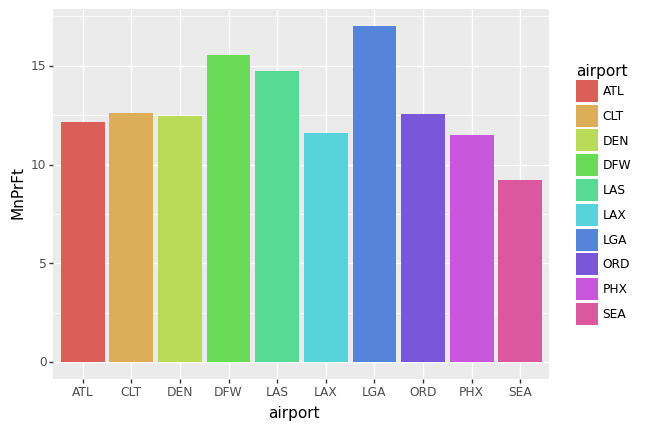

<ggplot: (8789260084571)>

In [407]:
## Plot top N by different columns
## Use max(50,N) to always include top 50 airports 

def plotairTopN(lowT,hiT, df, N):
    df = airTopN(lowT, hiT, df, max(50,N))
    df = df.head(N)
    return ggplot(df, aes(x='airport', y='arr_flights', fill = 'airport'))+geom_bar(stat='identity')
    
def plotairTopNad(lowT,hiT, df, N):
    df = airTopN(lowT, hiT, df, max(50,N)).head(N)
    return ggplot(df, aes(x='airport', y='arr_delay', fill = 'airport'))+geom_bar(stat='identity')
 
def plotairTopNmpf(lowT,hiT, df, N):
    df = airTopN(lowT, hiT, df, max(50,N)).head(N)
    return ggplot(df, aes(x='airport', y='MnPrFt', fill = 'airport'))+geom_bar(stat='identity')
plotairTopNmpf(9, 188, adf, 10)    
plotairTopNmpf(183, 185, adf, 10)

In [513]:
## we create similar functions for carriers in specfific
## Again, we first choose
## These give insight into which large carriers are frequently late

def carriers(lowT, hiT, df): 
    df = df.loc[(df['time']<=hiT) & (df['time']>= lowT)].groupby(['carrier']).agg({'arr_flights': sum, 'arr_delay':sum}).reset_index()
    df['MnPrFt'] = df['arr_delay']/df['arr_flights']
    return df

## Use to define Top N (by number of flight arrivals)
## We use this as people are most likely to fly to these airports
## We sort by other factors after this filtering
def carTopN(lowT, HiT, df, N):
    ap = carriers(lowT, HiT, df).sort_values(by='arr_flights', ascending = False)
    return ap.head(N)

def plotcarTopNaf(lowT,hiT, df, N):
    df = carTopN(lowT, hiT, df, max(50,N)).head(N)
    return ggplot(df, aes(x='carrier', y='arr_flights', fill = 'carrier'))+geom_bar(stat='identity')
    
def plotcarTopNad(lowT,hiT, df, N):
    df = carTopN(lowT, hiT, df, max(50,N)).head(N)
    return ggplot(df, aes(x='carrier', y='arr_delay', fill = 'carrier'))+geom_bar(stat='identity')
 
def plotcarTopNmpf(lowT,hiT, df, N):
    df = carTopN(lowT, hiT, df, max(50,N)).head(N)
    return ggplot(df, aes(x='carrier', y='MnPrFt', fill = 'carrier'))+geom_bar(stat='identity')


In [514]:
## We add time parameter to carTopN to create a change over time
def carovertime(lowT,hiT, df, N):
    ## Create first element.
    overtime = pd.DataFrame()
    for i in range(lowT,hiT+1):
        temp = carTopN(i, i, df, max({50,N}))
        temp['time']=i
        temp = temp.head()
        overtime=pd.concat([overtime, temp], axis=0)
    return overtime.drop_duplicates()


In [515]:
## We can use this information to graph over time as well for each of these carriers.
def plotcarOTaf(lowT,hiT, df, N):
    df=carovertime(lowT,hiT, df, N)
    return ggplot(df, aes(x='time', y='arr_flights', fill = 'carrier'))+geom_point()
    
def plotcarOTad(lowT,hiT, df, N):
    df=carovertime(lowT,hiT, df, N)
    return ggplot(df, aes(x='time', y='arr_delay', fill = 'carrier'))+geom_point()
 
def plotcarOTmpf(lowT,hiT, df, N):
    df=carovertime(lowT,hiT, df, N)
    return ggplot(df, aes(x='time', y='MnPrFt', fill = 'carrier'))+geom_point(size=2)+geom_line(aes(group ='carrier', color = 'carrier'),size=0.1)

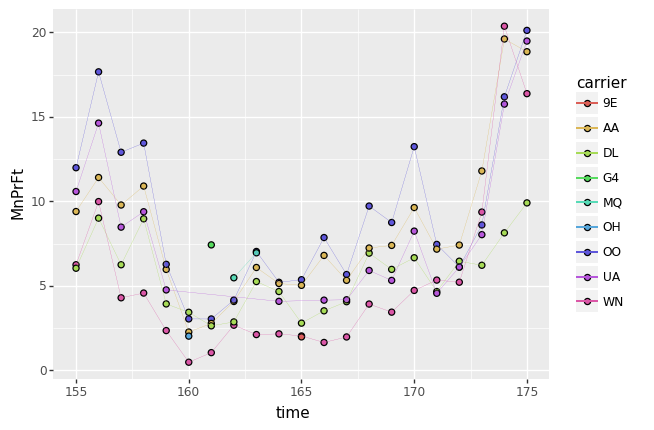

<ggplot: (8789211803932)>

In [516]:
## Focusing on the window around April 2020
plotcarOTmpf(155,175,adf, 5)

In [520]:
## We can again do things similarly for top airports.
def airovertime(lowT,hiT, df, N):
    ## Create first element.
    overtime = pd.DataFrame()
    for i in range(lowT,hiT+1):
        temp = airTopN(i, i, df, max({N,50})) ## include 50 airports with most arrivals that month
        temp['time']=i
        temp = temp.head(N)
        overtime=pd.concat([overtime, temp], axis=0)
    return overtime

def plotairOTaf(lowT,hiT, df, N):
    df=airovertime(lowT,hiT, df,N)
    return ggplot(df, aes(x='time', y='arr_flights', fill = 'airport'))+geom_point()
    
def plotairOTad(lowT,hiT, df, N):
    df=airovertime(lowT,hiT, df,N)
    return ggplot(df, aes(x='time', y='arr_delay', fill = 'airport'))+geom_point()
 
def plotairOTmpf(lowT,hiT, df, N):
    df=airovertime(lowT,hiT, df, N)
    return ggplot(df, aes(x='time', y='MnPrFt', fill = 'airport'))+geom_point(size=2)+geom_line(aes(group ='airport', color = 'airport'),size=0.1)

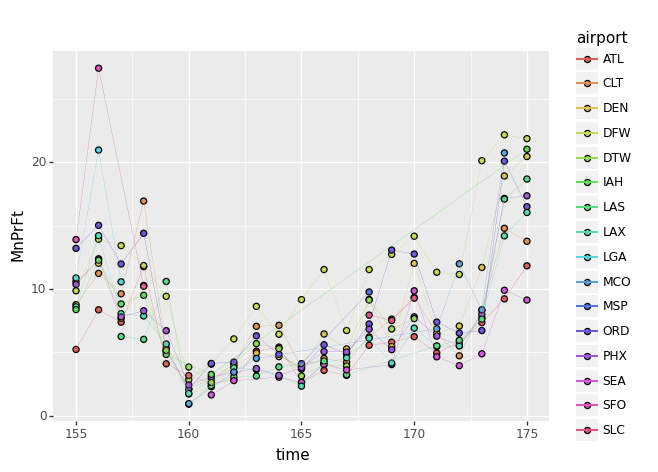

<ggplot: (8789223137076)>

In [522]:
plotairOTmpf(155, 175, adf, 10)